# Stack to do GenerativeAI is OPL
OPL = OpenAI + Pinecone + Langchain
With the combination of these 3 we can make GenAI application. That's why python static typing was very important

# Pandas
* filtering
* sorting
* useful methods
* groupby
* merge

In [1]:
import pandas as pd
from datetime import datetime

# Define the data as a list of dictionaries with 10 student records
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Mathematics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Computer Science', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df : pd.DataFrame = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Show the DataFrame
display(students_df)

# Verify the data types
display(students_df.info())

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Mathematics,2023-04-10,13000
4,5,Eva,John,Computer Science,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   roll_no            10 non-null     int64         
 1   name               10 non-null     object        
 2   father             10 non-null     object        
 3   course             10 non-null     object        
 4   date_of_admission  10 non-null     datetime64[ns]
 5   fee                10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 612.0+ bytes


None

In [7]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# Define the schema using SchemaModel
class StudentSchema(pa.SchemaModel):
    roll_no: Series[int] = pa.Field(ge=1) #ge = greater then
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=True)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True  # Automatically coerce types if possible
        strict = True  # Ensure all columns are accounted for in the schema

# Data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': None, 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': None, 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Validate the DataFrame
validated_df = StudentSchema.validate(students_df)
display(validated_df)

# print(validated_df)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,None,2023-06-21,15000
6,7,Grace,Harry,None,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


## Apply the filter or filter function on dataframe

In [8]:
students_df.head()

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000


In [9]:
# dataframe.columnName.value_counts() -> applyable to any column to count then numbers 
#value_counts() -> take out unique value on left side i.e physics, chemistry, biology etc and on right side tell the counts of those unique value
students_df.course.value_counts()

course
Physics      3
Chemistry    1
Biology      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

## We want to count null cells so for that

In [10]:
students_df.course.value_counts(dropna = False) #also count null cells values

course
Physics      3
None         2
Chemistry    1
Biology      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

### Count value on percentage with respect to 1%

In [13]:
display(students_df.course.value_counts(dropna = False, normalize = True))

course
Physics      0.3
None         0.2
Chemistry    0.1
Biology      0.1
Geography    0.1
English      0.1
Art          0.1
Name: proportion, dtype: float64

### Count value on percentage with respect to 100%

In [14]:
display(students_df.course.value_counts(dropna = False, normalize = True) * 100)

course
Physics      30.0
None         20.0
Chemistry    10.0
Biology      10.0
Geography    10.0
English      10.0
Art          10.0
Name: proportion, dtype: float64

In [15]:
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,None,2023-06-21,15000
6,7,Grace,Harry,None,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a seed for reproducibility
np.random.seed(0)

# Define the number of transactions
num_transactions = 1000

# Generate random dates within the current year
current_year = datetime.now().year
start_date = datetime(current_year, 1, 1)
end_date = datetime.now()

# Generate a list of random dates within the year
random_dates = [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
                for _ in range(num_transactions)]

# Generate a list of random fee amounts
random_fees = np.random.randint(low=1, high=5000, size=num_transactions)

# Create the DataFrame
fee_transactions = pd.DataFrame({
    'date': random_dates,
    'fee': random_fees
})

# Sort by date for readability
fee_transactions.sort_values('date', inplace=True)

# Reset index after sorting
fee_transactions.reset_index(drop=True, inplace=True)

display(fee_transactions)

,date,fee
0,2023-01-01,4525
1,2023-01-01,1867
2,2023-01-01,2299
3,2023-01-01,3005
4,2023-01-03,638
...,...,...
995,2023-12-01,3340
996,2023-12-01,4117
997,2023-12-02,2334
998,2023-12-02,1782


In [22]:
fee_transactions.head()

,date,fee
0,2023-01-01,4525
1,2023-01-01,1867
2,2023-01-01,2299
3,2023-01-01,3005
4,2023-01-03,638


### Divide the Fee into categories of 1-500, 500-1000, 1000-3000, 3000-4000, 4000-5000

In [21]:
pd.cut(fee_transactions.fee, [1,500,1000,3000,4000,5000])

0      (4000, 5000]
1      (1000, 3000]
2      (1000, 3000]
3      (3000, 4000]
4       (500, 1000]
           ...     
995    (3000, 4000]
996    (4000, 5000]
997    (1000, 3000]
998    (1000, 3000]
999    (1000, 3000]
Name: fee, Length: 1000, dtype: category
Categories (5, interval[int64, right]): [(1, 500] < (500, 1000] < (1000, 3000] < (3000, 4000] < (4000, 5000]]

### Now we want to figure out count of every category

In [23]:
pd.cut(fee_transactions.fee, [1,500,1000,3000,4000,5000]).value_counts()

fee
(1000, 3000]    422
(3000, 4000]    199
(4000, 5000]    197
(1, 500]        108
(500, 1000]      74
Name: count, dtype: int64

In [24]:
pd.cut(fee_transactions.fee, [1,500,1000,3000,4000,5000]).value_counts(normalize=True) * 100 #checking with percentage

fee
(1000, 3000]    42.2
(3000, 4000]    19.9
(4000, 5000]    19.7
(1, 500]        10.8
(500, 1000]      7.4
Name: proportion, dtype: float64

In [25]:
pd.qcut(fee_transactions.fee, [0,0.3,0.5,0.7,0.9,1]) #bringing values on base of these percentages

0      (4461.7, 4998.0]
1      (1560.3, 2432.0]
2      (1560.3, 2432.0]
3      (2432.0, 3552.4]
4      (13.999, 1560.3]
             ...       
995    (2432.0, 3552.4]
996    (3552.4, 4461.7]
997    (1560.3, 2432.0]
998    (1560.3, 2432.0]
999    (1560.3, 2432.0]
Name: fee, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(13.999, 1560.3] < (1560.3, 2432.0] < (2432.0, 3552.4] < (3552.4, 4461.7] < (4461.7, 4998.0]]

In [26]:
pd.qcut(fee_transactions.fee, [0,0.3,0.5,0.7,0.9,1]).value_counts(normalize=True) * 100

fee
(13.999, 1560.3]    30.0
(1560.3, 2432.0]    20.0
(2432.0, 3552.4]    20.0
(3552.4, 4461.7]    20.0
(4461.7, 4998.0]    10.0
Name: proportion, dtype: float64

In [27]:
students_df.head()

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000


## Filter on columns
* we can add & , | , ~ these sign between conditions
Syntax:
```
dataframe[(dataframe.columnName == "value")]
                    condition 1                             condition 2
dataframe[(dataframe.columnName1 == "value1") & (dataframe.columnName2 == "value2")]
```

* filter will apply on:
    * string column
    * numeric column
    * datetime column


In [35]:
import pandas as pd
from datetime import datetime

# Define the data as a list of dictionaries with 10 student records
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df : pd.DataFrame = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Show the DataFrame
display(students_df)

# Verify the data types
display(students_df.info())

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   roll_no            10 non-null     int64         
 1   name               10 non-null     object        
 2   father             10 non-null     object        
 3   course             10 non-null     object        
 4   date_of_admission  10 non-null     datetime64[ns]
 5   fee                10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 612.0+ bytes


None

In [36]:
students_df.head(10000)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


### we want students of only physics course

In [37]:
students_df['course']

0      Physics
1    Chemistry
2      Biology
3      physics
4      Physics
5    Economics
6      History
7    Geography
8      English
9          Art
Name: course, dtype: object

In [38]:
students_df['course'] == 'Physics'

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [39]:
#Boolean slicing
students_df[students_df['course'] == 'Physics']

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
4,5,Eva,John,Physics,2023-05-16,14000


In [41]:
students_df['course'].str.lower() #convert all columns name to lower case

0      physics
1    chemistry
2      biology
3      physics
4      physics
5    economics
6      history
7    geography
8      english
9          art
Name: course, dtype: object

In [42]:
students_df['course'].str.lower() == "physics"

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [43]:
students_df[students_df['course'].str.lower() == "physics"]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000


### Content search - like get those values whoes end with cs

In [47]:
students_df['course'].str.lower().str.contains('cs')

0     True
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [48]:
students_df[students_df['course'].str.lower().str.contains('cs')]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000


### Multiple filteration

In [49]:
students_df[(students_df['course'].str.lower().str.contains('cs')) & (students_df['fee'] >= 14000)]

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000


In [53]:
display(students_df['course'].str.lower().str.contains('cs'))
display(students_df['course'].str.lower().str.contains('r'))

(students_df['course'].str.lower().str.contains('cs')) & (students_df['course'].str.lower().str.contains('r')) #not mendatory to add brackets here

0     True
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: course, dtype: bool

0    False
1     True
2    False
3    False
4    False
5    False
6     True
7     True
8    False
9     True
Name: course, dtype: bool

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [54]:
students_df['course'].str.lower().str.contains('cs') | students_df['course'].str.lower().str.contains('r')

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8    False
9     True
Name: course, dtype: bool

In [55]:
students_df[students_df['course'].str.lower().str.contains('cs') | students_df['course'].str.lower().str.contains('r')]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
9,10,Jack,Noah,Art,2023-10-05,19000


In [56]:
import pandas as pd
from datetime import datetime

# Define the data as a list of dictionaries with 10 student records
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df : pd.DataFrame = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Show the DataFrame
display(students_df)

# Verify the data types
display(students_df.info())

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   roll_no            10 non-null     int64         
 1   name               10 non-null     object        
 2   father             10 non-null     object        
 3   course             10 non-null     object        
 4   date_of_admission  10 non-null     datetime64[ns]
 5   fee                10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 612.0+ bytes


None

## Apply filter on date column
* dataframe.column.dt.datetimefunctions
* Important functions of dateTime: used for groub-by
    * dt.strftime - convert object into fstring object
    * dt.strptime - return value in datetime - convert object into dateobject (p for post) 

In pandas, when you have a datetime column in a DataFrame, you can format the date and time information using the strftime method which allows for flexible formatting by specifying format codes. Each code represents a different element of the date and time. Below are some of the commonly used format codes that you can use with strftime:

    * %a - Abbreviated weekday name.
    * %A - Full weekday name.
    * %w - Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
    * %d - Day of the month as a zero-padded decimal number.
    * %b - Abbreviated month name.
    * %B - Full month name.
    * %m - Month as a zero-padded decimal number.
    * %y - Year without century as a zero-padded decimal number.
    * %Y - Year with century as a decimal number.
    * %H - Hour (24-hour clock) as a zero-padded decimal number.
    * %I - Hour (12-hour clock) as a zero-padded decimal number.
    * %p - Locale’s equivalent of either AM or PM.
    * %M - Minute as a zero-padded decimal number.
    * %S - Second as a zero-padded decimal number.
    * %f - Microsecond as a decimal number, zero-padded on the left.
    * %z - UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).
    * %Z - Time zone name (empty string if the object is naive).
    * %j - Day of the year as a zero-padded decimal number.
    * %U - Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number.
    * %W - Week number of the year (Monday as the first day of the week) as a zero-padded decimal number.
    * %c - Locale’s appropriate date and time representation.
    * %x - Locale’s appropriate date representation.
    * %X - Locale’s appropriate time representation.
    * %G - ISO 8601 year with century representing the year that contains the greater part of the ISO week (%V).
    * %u - ISO 8601 weekday as a decimal number where 1 is Monday.
    * %V - ISO 8601 week number as a decimal number with Monday as the first day of the week.
    
Here's a small example of how to use strftime with a pandas DataFrame:

```
import pandas as pd

# Create a sample DataFrame with datetime column
df = pd.DataFrame({
    'datetime': pd.date_range(start='2023-01-01', periods=3, freq='D')
})

# Format the 'datetime' column as a string with a specific format
df['formatted_date'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(df)
```
The 'formatted_date' column will contain strings representing the dates in the format specified by the strftime method. You can combine any of the symbols above to create the date format string as per your requirements.

#### To check datetime functions

In [63]:
[i for i in dir(students_df['date_of_admission'].dt) if "_" not in i]

['ceil',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'tz',
 'unit',
 'weekday',
 'year']

In [66]:
students_df['date_of_admission']

0   2023-01-10
1   2023-02-12
2   2023-03-14
3   2023-04-10
4   2023-05-16
5   2023-06-21
6   2023-07-25
7   2023-08-17
8   2023-09-10
9   2023-10-05
Name: date_of_admission, dtype: datetime64[ns]

In [64]:
students_df['date_of_admission'].dt.day_of_year

0     10
1     43
2     73
3    100
4    136
5    172
6    206
7    229
8    253
9    278
Name: date_of_admission, dtype: int32

In [65]:
students_df['date_of_admission'].dt.year

0    2023
1    2023
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2023
9    2023
Name: date_of_admission, dtype: int32

In [67]:
students_df['date_of_admission'].dt.month

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: date_of_admission, dtype: int32

In [69]:
students_df['date_of_admission'].dt.day

0    10
1    12
2    14
3    10
4    16
5    21
6    25
7    17
8    10
9     5
Name: date_of_admission, dtype: int32

In [81]:
students_df['date_of_admission'].dt.date
students_df['date_of_admission'].dt.hour
students_df['date_of_admission'].dt.minute
students_df['date_of_admission'].dt.second
students_df['date_of_admission'].dt.microsecond
students_df['date_of_admission'].dt.tz
students_df['date_of_admission'].dt.tz_localize
students_df['date_of_admission'].dt.tz_convert
students_df['date_of_admission'].dt.tz_localize('Asia/Kolkata')



0   2023-01-10 00:00:00+05:30
1   2023-02-12 00:00:00+05:30
2   2023-03-14 00:00:00+05:30
3   2023-04-10 00:00:00+05:30
4   2023-05-16 00:00:00+05:30
5   2023-06-21 00:00:00+05:30
6   2023-07-25 00:00:00+05:30
7   2023-08-17 00:00:00+05:30
8   2023-09-10 00:00:00+05:30
9   2023-10-05 00:00:00+05:30
Name: date_of_admission, dtype: datetime64[ns, Asia/Kolkata]

In [83]:
from datetime import datetime

date : datetime = datetime.now()
date

datetime.datetime(2023, 12, 5, 17, 0, 7, 64495)

In [85]:
s1 : pd.Series = pd.Series([date])
s1

0   2023-12-05 17:00:07.064495
dtype: datetime64[ns]

In [92]:
s1.dt.strftime("%Y/%m %d %I %b %B") #the answer is in text form - strftime() convert datetime64[ns] to text format

0    2023/12 05 05 Dec December
dtype: object

In [86]:
date : pd.DataFrame = pd.DataFrame(s1)

,0
0,2023-12-05 17:00:07.064495


In [93]:
s2 = pd.Series(['01 Nov 2023', '01 Nov 2024', '01 Jan 2023']) #here the output is in string type so...
s2

0    01 Nov 2023
1    01 Nov 2024
2    01 Jan 2023
dtype: object

In [94]:
# if you have data in string format and you want to convert it - so for that we will use strptime()
# so to apply the strptime() function it has to be in datetime so we are converting s2 in datetime from string

s2.apply(lambda x: datetime.strptime(x, "%d %b %Y")) #conversion here is string to datetime

0   2023-11-01
1   2024-11-01
2   2023-01-01
dtype: datetime64[ns]

# Group by
* dataframe.groupby(['column1','column2'])
* dataframe.groupby(['column1','column2'])[['col1','col2']].aggregate([min,max])
* dataframe.groupby(['column1','column2'])[['col1','col2']].apply(function())


In [95]:
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [96]:
students_df.groupby(['course']) #it is genertor function that's why it doesnot show result

In [97]:
list(students_df.groupby(['course']))

[(('Art',),
     roll_no  name father course date_of_admission    fee
  9       10  Jack   Noah    Art        2023-10-05  19000),
 (('Biology',),
     roll_no   name father   course date_of_admission    fee
  2        3  Chloe    Tim  Biology        2023-03-14  12000),
 (('Chemistry',),
     roll_no   name father     course date_of_admission    fee
  1        2  Brian  Steve  Chemistry        2023-02-12  11000),
 (('Economics',),
     roll_no   name father     course date_of_admission    fee
  5        6  Frank    Tom  Economics        2023-06-21  15000),
 (('English',),
     roll_no    name  father   course date_of_admission    fee
  8        9  Isabel  Oliver  English        2023-09-10  18000),
 (('Geography',),
     roll_no   name   father     course date_of_admission    fee
  7        8  Henry  Charles  Geography        2023-08-17  17000),
 (('History',),
     roll_no   name father   course date_of_admission    fee
  6        7  Grace  Harry  History        2023-07-25  16000),
 (('

In [98]:
list(students_df.groupby(['course']))[0]

(('Art',),
    roll_no  name father course date_of_admission    fee
 9       10  Jack   Noah    Art        2023-10-05  19000)

In [99]:
list(students_df.groupby(['course']))[0][0]

('Art',)

In [100]:
list(students_df.groupby(['course']))[0][1]

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


In [101]:
for group in list(students_df.groupby(['course'])):
    display(group[0])
    display(group[1])
    print("===========================")

('Art',)

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('Biology',)

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('Chemistry',)

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('Economics',)

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('English',)

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


('Geography',)

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('History',)

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('Physics',)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
4,5,Eva,John,Physics,2023-05-16,14000


('physics',)

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,physics,2023-04-10,13000


## Group by with year in 
This work as a groupby
```
students_df.groupby([students_df['date_of_admission'].dt.strftime("%B")])
```

In [102]:
#groupby with year
for group in list(students_df.groupby([students_df['date_of_admission'].dt.strftime("%B")])):
    display(group[0])
    display(group[1])
    print("=========================")

('April',)

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,physics,2023-04-10,13000


('August',)

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('February',)

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('January',)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


('July',)

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('June',)

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('March',)

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('May',)

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000


('October',)

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('September',)

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


In [ ]:
# now we can take count, highest fee collection, how many collection they have


In [103]:
# groupby on 2 level 
# groupby on month as well as course
students_df.groupby([students_df['date_of_admission'].dt.strftime("%B"), students_df['course']])

### Multi groupby

In [104]:
#groupby with month and course  
for group in list(students_df.groupby([students_df['date_of_admission'].dt.strftime("%B"), students_df['course']])):
    display(group[0])
    display(group[1])
    print("=========================")

('April', 'physics')

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,physics,2023-04-10,13000


('August', 'Geography')

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('February', 'Chemistry')

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('January', 'Physics')

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


('July', 'History')

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('June', 'Economics')

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('March', 'Biology')

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('May', 'Physics')

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000


('October', 'Art')

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('September', 'English')

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


In [105]:
students_df.groupby(['course']).aggregate('count') #get the count of every column but it dosesnot apply on every column

,roll_no,name,father,date_of_admission,fee
course,,,,,
Art,1,1,1,1,1
Biology,1,1,1,1,1
Chemistry,1,1,1,1,1
Economics,1,1,1,1,1
English,1,1,1,1,1
Geography,1,1,1,1,1
History,1,1,1,1,1
Physics,2,2,2,2,2
physics,1,1,1,1,1


In [106]:
students_df.groupby(students_df['course']).aggregate('count') #get the count of every column but it dosesnot apply on every column so for that solution is given next cell block 

,roll_no,name,father,date_of_admission,fee
course,,,,,
Art,1,1,1,1,1
Biology,1,1,1,1,1
Chemistry,1,1,1,1,1
Economics,1,1,1,1,1
English,1,1,1,1,1
Geography,1,1,1,1,1
History,1,1,1,1,1
Physics,2,2,2,2,2
physics,1,1,1,1,1


In [109]:
display(students_df.groupby(students_df['course'])['fee'].aggregate('count'))  # here we define a column on which the 

course
Art          1
Biology      1
Chemistry    1
Economics    1
English      1
Geography    1
History      1
Physics      2
physics      1
Name: fee, dtype: int64

In [110]:
students_df.groupby(students_df['course'])['fee'].agg([len])

,len
course,
Art,1
Biology,1
Chemistry,1
Economics,1
English,1
Geography,1
History,1
Physics,2
physics,1


In [111]:
students_df.groupby(students_df['course'])['fee'].agg([len, min, max])

C:\Users\wania\AppData\Local\Temp\ipykernel_24136\4279835314.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(students_df['course'])['fee'].agg([len, min, max])
C:\Users\wania\AppData\Local\Temp\ipykernel_24136\4279835314.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(students_df['course'])['fee'].agg([len, min, max])


,len,min,max
course,,,
Art,1,19000,19000
Biology,1,12000,12000
Chemistry,1,11000,11000
Economics,1,15000,15000
English,1,18000,18000
Geography,1,17000,17000
History,1,16000,16000
Physics,2,10000,14000
physics,1,13000,13000


In [112]:
students_df.groupby([students_df['course'], students_df['date_of_admission'].dt.strftime("%B")])['fee'].agg([len, min, max])

C:\Users\wania\AppData\Local\Temp\ipykernel_24136\22640142.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby([students_df['course'], students_df['date_of_admission'].dt.strftime("%B")])['fee'].agg([len, min, max])
C:\Users\wania\AppData\Local\Temp\ipykernel_24136\22640142.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby([students_df['course'], students_df['date_of_admission'].dt.strftime("%B")])['fee'].agg([len, min, max])


len    min    max
course    date_of_admission                   
Art       October              1  19000  19000
Biology   March                1  12000  12000
Chemistry February             1  11000  11000
Economics June                 1  15000  15000
English   September            1  18000  18000
Geography August               1  17000  17000
History   July                 1  16000  16000
Physics   January              1  10000  10000
          May                  1  14000  14000
physics   April                1  13000  13000

### Custom groupby

In [113]:
students_df.groupby(['course']).apply(lambda x: x)

roll_no    name   father     course date_of_admission    fee
course                                                                   
Art       9       10    Jack     Noah        Art        2023-10-05  19000
Biology   2        3   Chloe      Tim    Biology        2023-03-14  12000
Chemistry 1        2   Brian    Steve  Chemistry        2023-02-12  11000
Economics 5        6   Frank      Tom  Economics        2023-06-21  15000
English   8        9  Isabel   Oliver    English        2023-09-10  18000
Geography 7        8   Henry  Charles  Geography        2023-08-17  17000
History   6        7   Grace    Harry    History        2023-07-25  16000
Physics   0        1   Alice      Bob    Physics        2023-01-10  10000
          4        5     Eva     John    Physics        2023-05-16  14000
physics   3        4   David     Rick    physics        2023-04-10  13000

In [116]:
students_df.groupby(['course']).apply(lambda x: x.head(1)) #will take 1 sample of all course i.e Physics has 2 in above example but now has 1

,,roll_no,name,father,course,date_of_admission,fee
course,,,,,,,
Art,9,10,Jack,Noah,Art,2023-10-05,19000
Biology,2,3,Chloe,Tim,Biology,2023-03-14,12000
Chemistry,1,2,Brian,Steve,Chemistry,2023-02-12,11000
Economics,5,6,Frank,Tom,Economics,2023-06-21,15000
English,8,9,Isabel,Oliver,English,2023-09-10,18000
Geography,7,8,Henry,Charles,Geography,2023-08-17,17000
History,6,7,Grace,Harry,History,2023-07-25,16000
Physics,0,1,Alice,Bob,Physics,2023-01-10,10000
physics,3,4,David,Rick,physics,2023-04-10,13000


### Data Visualization

In [118]:
students_df['course'].value_counts() #this example and below example - both are same just a different way to write

course
Physics      2
Chemistry    1
Biology      1
physics      1
Economics    1
History      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

In [117]:
students_df.course.value_counts()

course
Physics      2
Chemistry    1
Biology      1
physics      1
Economics    1
History      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

<Axes: xlabel='course'>

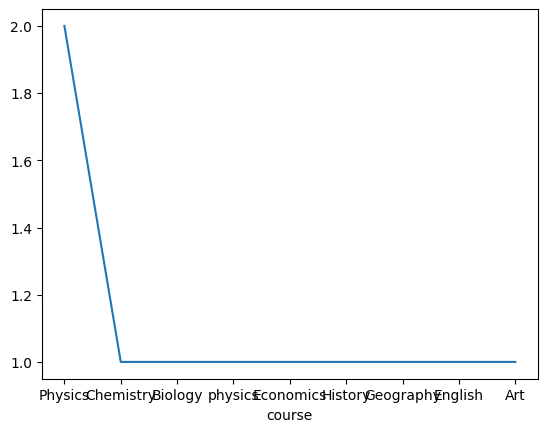

In [119]:
students_df.course.value_counts().plot()

<Axes: xlabel='course'>

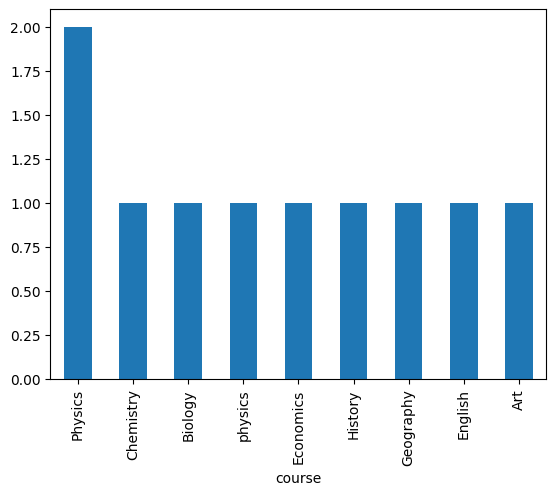

In [120]:
students_df.course.value_counts().plot(kind = 'bar')

<Axes: ylabel='proportion'>

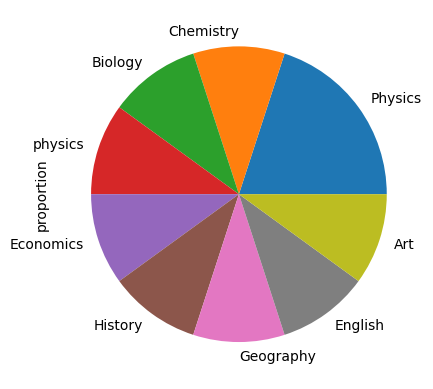

In [125]:
students_df.course.value_counts(normalize=True).plot(kind = 'pie')

C:\Users\wania\AppData\Local\Temp\ipykernel_24136\2649267850.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course'])[['fee']].aggregate([min,max, np.mean]).plot(kind="bar")
C:\Users\wania\AppData\Local\Temp\ipykernel_24136\2649267850.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course'])[['fee']].aggregate([min,max, np.mean]).plot(kind="bar")
C:\Users\wania\AppData\Local\Temp\ipykernel_24136\2649267850.py:1: FutureWarning: The provided callable <function mean at 0x000002BA9CA9E340> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided

<Axes: xlabel='course'>

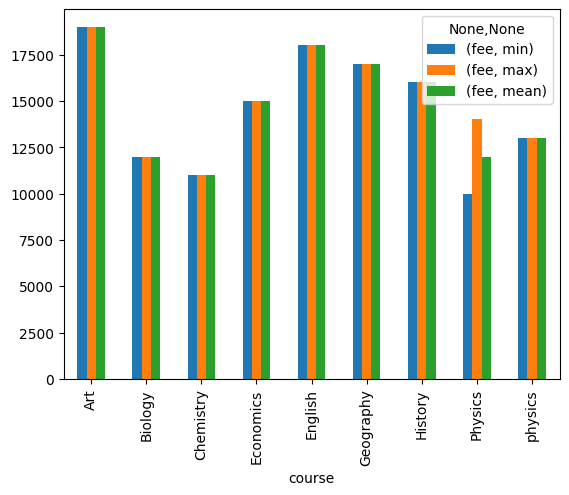

In [127]:
students_df.groupby(['course'])[['fee']].aggregate([min,max, np.mean]).plot(kind="bar")

# Data Wraggling
Data wragling is joining the data - 
We dont have a data in single database 
Let's suppose you're working in bank, for atm transaction we have seperate table, for online trasaction we have seperate table, customer information is in seperate table , credit card trasaction is on seperate table. All these tables must have relation with one another. So to connect all the tables is known as "Data wraggling"
* .merge
* .join
* pd.concat([df1, df2])

# Joining
* left join
* right join
* inner join
* outer join
* cross join

https://www.w3schools.com/sql/sql_join.asp

In [128]:
import pandas as pd
from typing import Dict, Union, List, Iterator

from collections.abc import Iterator

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 102]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'teacher_id': [101, 102, 103],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [129]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,102


In [130]:
teachers

,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


In [131]:
student_fees


,student_id,fee_paid
0,1,1500
1,2,1500
2,3,1500
3,4,1500
4,5,1500
